<a href="https://colab.research.google.com/github/maicon-reis/outspoken-market-na-pratica/blob/main/17_Padr%C3%B5es_de_candlestick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 17. Padrões de candlestick

 

#### Etapas


- Passo 1 - Instalar e carregar a ta-lib

- Passo 2 - Carregar a base de dados

- Passo 3 - Ajustes e Construçao dos alvos

- Passo 4 - Conhecendo a biblioteca

- Passo 5 - Insights práticos

- Passo 6 - Análise em um contexto mais amplo

________________________________________________________


### Passo 1 - Instalar e carregar a ta-lib

In [1]:
# No Google Colab a instalação da biblioteca se dá com:
!pip install talib-binary

     |████████████████████████████████| 2.4 MB 4.1 MB/s 


In [ ]:
#pip install ta-lib

# Não use o pip install para a ta-lib. Faça
# conda install -c conda-forge ta-lib no prompt do Anaconda

# https://pypi.org/project/TA-Lib/

In [2]:
# Carregando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols
import talib
get_ipython().run_line_magic("matplotlib", "inline")
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


______________________________________________________

### Passo 2 - Carregar a base de dados

In [3]:
# Carregando a base de dados e fazendo os checks iniciais
csv_file = "https://raw.githubusercontent.com/maicon-reis/financas_quantitativas/main/arquivos/ibov-2000_2021"

df = pd.read_csv(csv_file, usecols=["Date", "Open", "High", "Low", "Close", "Adj Close"])

# Modificando o formato da data
df['Date'] = pd.to_datetime(df["Date"]).dt.normalize()

# Configurando a data como índice
df.set_index("Date", inplace=True)
df.index.name = "Data"

______________________________________________________

### Passo 3 - Ajustes e Construçao dos alvos

In [4]:
# Construção dos alvos

# Alvo 1 - Retorno
df["Retorno"] = df["Adj Close"].pct_change(1)
df["Alvo1"] = df["Retorno"].shift(-1)

# Alvo 5 - Retorno
df["Retorno5"] = df["Adj Close"].pct_change(5)
df["Alvo5"] = df["Retorno5"].shift(-5)

# Alvo 10 - Retorno
df["Retorno10"] = df["Adj Close"].pct_change(10)
df["Alvo10"] = df["Retorno10"].shift(-10)

# Criacao dos alvos categoricos
df["Alvo1_cat"] = np.where(df["Alvo1"] > 0 , 1, 0)
df["Alvo5_cat"] = np.where(df["Alvo5"] > 0 , 1, 0)
df["Alvo10_cat"] = np.where(df["Alvo10"] > 0 , 1, 0)

In [5]:
# Verificando os dados
df.head(5)

,Open,High,Low,Close,Adj Close,Retorno,Alvo1,Retorno5,Alvo5,Retorno10,Alvo10,Alvo1_cat,Alvo5_cat,Alvo10_cat
Data,,,,,,,,,,,,,,
2000-01-03,17098.0,17408.0,16719.0,16930.0,16930.0,NaN,-0.063733,NaN,0.005434,NaN,0.066332,0,1,1
2000-01-04,16908.0,16908.0,15851.0,15851.0,15851.0,-0.063733,0.024856,NaN,0.045549,NaN,0.129456,1,1,1
2000-01-05,15871.0,16302.0,15350.0,16245.0,16245.0,0.024856,-0.008495,NaN,0.022899,NaN,0.075408,0,1,1
2000-01-06,16237.0,16499.0,15977.0,16107.0,16107.0,-0.008495,0.012541,NaN,0.073943,NaN,0.066431,1,1,1
2000-01-07,16125.0,16449.0,16125.0,16309.0,16309.0,0.012541,0.043718,NaN,0.082715,NaN,0.044454,1,1,1


In [7]:
# Verificando algumas informações estatísticas sobre os dados
df.describe()

,Open,High,Low,Close,Adj Close,Retorno,Alvo1,Retorno5,Alvo5,Retorno10,Alvo10,Alvo1_cat,Alvo5_cat,Alvo10_cat
count,5441.000000,5441.000000,5441.000000,5441.000000,5441.000000,5440.000000,5440.000000,5436.000000,5436.000000,5431.000000,5431.000000,5441.000000,5441.000000,5441.000000
mean,53056.533174,53610.275133,52506.649881,53071.201985,53071.201985,0.000495,0.000495,0.002454,0.002454,0.004794,0.004794,0.518471,0.549348,0.552472
std,29010.729007,29246.980405,28769.429870,29015.877413,29015.877413,0.017928,0.017928,0.038245,0.038245,0.051969,0.051969,0.499705,0.497605,0.497285
min,8397.000000,8513.000000,8225.000000,8371.000000,8371.000000,-0.147797,-0.147797,-0.290024,-0.290024,-0.376119,-0.376119,0.000000,0.000000,0.000000
25%,26612.000000,26824.000000,26267.000000,26618.000000,26618.000000,-0.009219,-0.009219,-0.020122,-0.020122,-0.026910,-0.026910,0.000000,0.000000,0.000000
50%,53738.000000,54236.000000,53091.000000,53748.000000,53748.000000,0.000722,0.000722,0.004069,0.004069,0.006449,0.006449,1.000000,1.000000,1.000000
75%,66951.000000,67502.000000,66342.000000,66954.000000,66954.000000,0.010630,0.010630,0.025560,0.025560,0.038860,0.038860,1.000000,1.000000,1.000000
max,130776.000000,131190.000000,129526.000000,130776.000000,130776.000000,0.146560,0.146560,0.299439,0.299439,0.249397,0.249397,1.000000,1.000000,1.000000


______________________________________________________

### Passo 4 - Conhecendo a biblioteca

O método get_functions lista todas as funções de indicadores disponíveis, porém o formato não é agradável. Utilizando o método get_functions_groups é possível visualizar dicionários com as categorias, tornando mais prática a seleção.

In [8]:
# Visualiza todas as funções disponíveis como uma lista


print(talib.get_functions())

['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJISTAR',

In [9]:
# Visualiza todas as funções disponíveis como um dicionário

print(talib.get_function_groups())

{'Cycle Indicators': ['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE'], 'Math Operators': ['ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM'], 'Math Transform': ['ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH'], 'Momentum Indicators': ['ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR'], 'Overlap Studies': ['BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA'], 'Pattern Recognition': ['CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHO

In [10]:
# Visualiza o dicionário de funções de uma maneira mais "humana"

import json

print(json.dumps(talib.get_function_groups(), sort_keys = True, indent = 4))

{
    "Cycle Indicators": [
        "HT_DCPERIOD",
        "HT_DCPHASE",
        "HT_PHASOR",
        "HT_SINE",
        "HT_TRENDMODE"
    ],
    "Math Operators": [
        "ADD",
        "DIV",
        "MAX",
        "MAXINDEX",
        "MIN",
        "MININDEX",
        "MINMAX",
        "MINMAXINDEX",
        "MULT",
        "SUB",
        "SUM"
    ],
    "Math Transform": [
        "ACOS",
        "ASIN",
        "ATAN",
        "CEIL",
        "COS",
        "COSH",
        "EXP",
        "FLOOR",
        "LN",
        "LOG10",
        "SIN",
        "SINH",
        "SQRT",
        "TAN",
        "TANH"
    ],
    "Momentum Indicators": [
        "ADX",
        "ADXR",
        "APO",
        "AROON",
        "AROONOSC",
        "BOP",
        "CCI",
        "CMO",
        "DX",
        "MACD",
        "MACDEXT",
        "MACDFIX",
        "MFI",
        "MINUS_DI",
        "MINUS_DM",
        "MOM",
        "PLUS_DI",
        "PLUS_DM",
        "PPO",
        "ROC",
        "RO

In [11]:
# listando somente os padrões de candle
padroes = talib.get_function_groups()["Pattern Recognition"]
padroes

['CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CDLPIERCING',
 'CDLRICKSHAWMAN',
 'CDLRISEFALL3METHODS',
 'CDLSEPARATINGLINES',
 'CDLSHOOTINGSTAR',
 'CDLSHORTLINE',
 'CDLSPINNINGTOP',
 'CDLSTALLEDPATTERN',
 

In [12]:
# Quantidade de padrões disponíveis
len(padroes)

61

______________________________________________________

In [13]:
# Cria um gráfico com uma reta de inclinação entre os dados
def cria_grafico(coluna, name_col):
    df_col = df[coluna != 0] 
    df_col.dropna(inplace = True)

    # Grafico da relação entre o retorno do dia da doji e o alvo

    plt.figure(figsize = (18, 8))
    plt.subplot(1, 3, 1) # linhas, colunas e painel
    plt.plot(df_col["Retorno"], df_col["Alvo1"], "*", color = "blue", label = "Real x Previsto")
    plt.xlabel(f"Retorno da {name_col}")
    plt.ylabel("Alvo1")
    m, b = np.polyfit(df_col["Retorno"], df_col["Alvo1"], 1)
    plt.plot(df_col["Retorno"], m*df_col["Retorno"] + b, color = "red")
    plt.title(f"Relação entre uma {name_col} e o Alvo em 1 período");

    plt.subplot(1, 3, 2) # linhas, colunas e painel
    plt.plot(df_col["Retorno"], df_col["Alvo5"], "*", color = "blue", label = "Real x Previsto")
    plt.xlabel(f"Retorno da {name_col}")
    plt.ylabel("Alvo5")
    m, b = np.polyfit(df_col["Retorno"], df_col["Alvo5"], 1)
    plt.plot(df_col["Retorno"], m*df_col["Retorno"] + b, color = "red")
    plt.title(f"Relação entre uma {name_col} e o Alvo em 5 períodos");

    plt.subplot(1, 3, 3) # linhas, colunas e painel
    plt.plot(df_col["Retorno"], df_col["Alvo10"], "*", color = "blue", label = "Real x Previsto")
    plt.xlabel(f"Retorno da {name_col}")
    plt.ylabel("Alvo10")
    m, b = np.polyfit(df_col["Retorno"], df_col["Alvo10"], 1)
    plt.plot(df_col["Retorno"], m*df_col["Retorno"] + b, color = "red")
    plt.title(f"Relação entre uma {name_col} e o Alvo em 10 períodos");
    return df_col

### Passo 5 - Insights práticos

### **Doji**

In [14]:
df["doji_star"] = talib.CDLDOJISTAR(df["Open"], df["High"], df["Low"], df["Close"])

df["doji_star"].nunique()

3

In [15]:
df["doji_star"] = np.where(df["doji_star"] == 100, 1
                           , np.where(df["doji_star"] == -100, -1, 0))

Com a criação da pivot table indexando os valores do padrão de candle pelos retornos percentuais, obtém-se na média, se os retornos foram positivos ou negativos, e em que proporção.

Verifiquei que, para um alvo de 10 períodos, tem-se uma média positiva relevante tanto quando o doji_star está setado como -1, quando com 1.

In [18]:
doji = pd.pivot_table(df
               , index = ["doji_star"]
               , values = ["Alvo1", "Alvo5", "Alvo10"]
               , aggfunc = np.mean)*100

# Verificando os dados
doji

,Alvo1,Alvo10,Alvo5
doji_star,,,
-1,0.542657,1.270057,1.022424
0,0.044983,0.467917,0.236332
1,0.186390,1.577027,0.860611


In [20]:
df_2 = df[df["doji_star"] == -1]

In [27]:
df_2['Alvo10'].mean() * 100

1.270056705691437

Quando fazemos uma pivot table com os alvos categóricos podemos ter a ideia da variação percentual entre dias de alta e dias de baixa após o evento do padrão.

Em conjunto com a tabela pivot anterior podemos verificar se há uma direção clara quando da ocorrência do padrão de candle associado ao alvo.

Veja que da análise da Doji para um alvo de 10 períodos tem-se valores de retorno médio acima de 1%, com porcentagem de alta superiores a 65%, o que denota, através dessa simples análise dos dados que é um padrão forte para um alvo de 10 períodos.

In [ ]:
doji_cat = pd.pivot_table(df
               , index = ["doji_star"]
               , values = ["Alvo1_cat", "Alvo5_cat", "Alvo10_cat"]
               , aggfunc = np.mean) * 100

# Verificando resultado
doji_cat

,Alvo10_cat,Alvo1_cat,Alvo5_cat
doji_star,,,
-1,69.047619,61.904762,57.142857
0,55.090266,51.740182,54.885539
1,65.384615,57.692308,61.538462


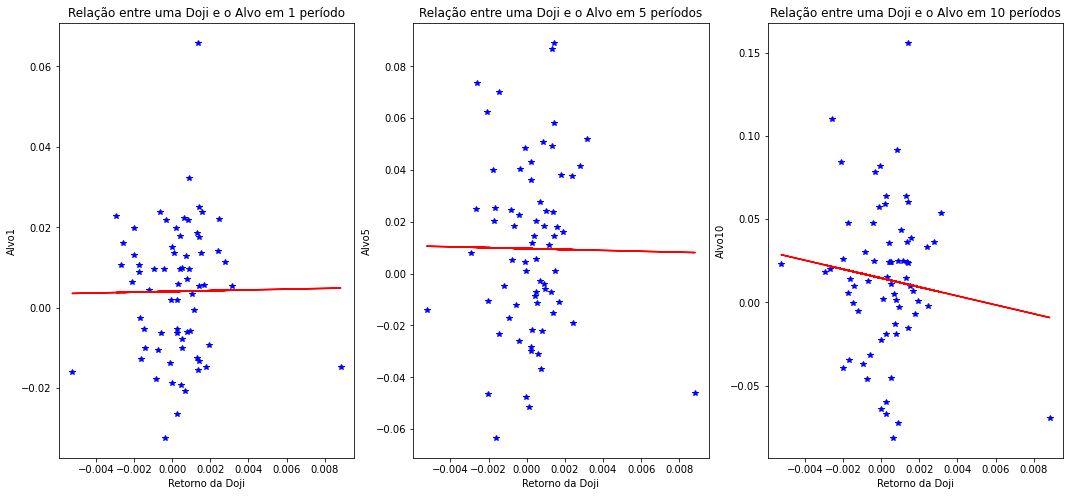

In [ ]:
# Gráfico de relação entre variável e alvo
df_doji = cria_grafico(df["doji_star"], "Doji")

### **Morubozu**

In [ ]:
df["marubozu"] = talib.CDLCLOSINGMARUBOZU(df["Open"], df["High"], df["Low"], df["Close"])
df["marubozu"] = np.where(df["marubozu"] == 100, 1
                            , np.where(df["marubozu"] == -100, -1, 0))

Já para o Marubozu, eu verifiquei um padrão interessante somente quando o padrão de candle é setado como -1, apresentando um retorno médio de quase 0.85, e uma média positiva de mais de 58%.

In [ ]:
marubozu = pd.pivot_table(df
               , index = ["marubozu"]
               , values = ["Alvo1", "Alvo5", "Alvo10"]
               , aggfunc = np.mean)*100
marubozu

,Alvo1,Alvo10,Alvo5
marubozu,,,
-1,0.141213,0.845167,0.536881
0,0.025183,0.478836,0.227567
1,0.148672,0.251068,0.175598


In [ ]:
marubozu_cat = pd.pivot_table(df
               , index = ["marubozu"]
               , values = ["Alvo1_cat", "Alvo5_cat", "Alvo10_cat"]
               , aggfunc = np.mean)*100
marubozu_cat

,Alvo10_cat,Alvo1_cat,Alvo5_cat
marubozu,,,
-1,58.450704,54.929577,56.103286
0,55.179558,51.565378,54.765193
1,53.651267,51.713860,55.290611


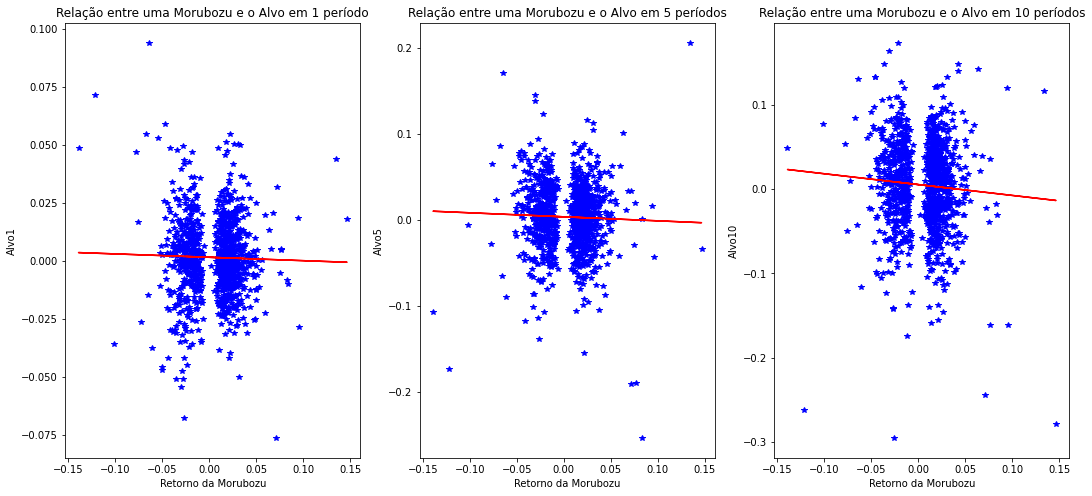

In [ ]:
df_marubozu = cria_grafico(df["marubozu"], "Morubozu")

In [ ]:
df_marubozu["marubozu"].unique()

array([-1,  1])

### **Harami**

In [ ]:
df["harami"] = talib.CDLHARAMI(df["Open"], df["High"], df["Low"], df["Close"])
df["harami"] = np.where(df["harami"] == 100, 1
                        , np.where(df["harami"] == -100, -1, 0))

Já no harami, o padrão mais relevante é, também para um alvo de 10, em que apresenta, quando setado como 1, um retorno médio de 0,83 com um percentual de positivos de mais de 58%.

In [ ]:
harami = pd.pivot_table(df
               , index = ["harami"]
               , values = ["Alvo1", "Alvo5", "Alvo10"]
               , aggfunc = np.mean)*100
Code
Text

harami

,Alvo1,Alvo10,Alvo5
harami,,,
-1,-0.102290,0.303356,0.206419
0,0.053350,0.471462,0.233676
1,0.033993,0.831382,0.619600


In [ ]:
harami_cat = pd.pivot_table(df
               , index = ["harami"]
               , values = ["Alvo1_cat", "Alvo5_cat", "Alvo10_cat"]
               , aggfunc = np.mean)*100
harami_cat

,Alvo10_cat,Alvo1_cat,Alvo5_cat
harami,,,
-1,52.212389,48.672566,52.212389
0,55.208535,51.716780,54.898157
1,58.381503,57.803468,57.803468


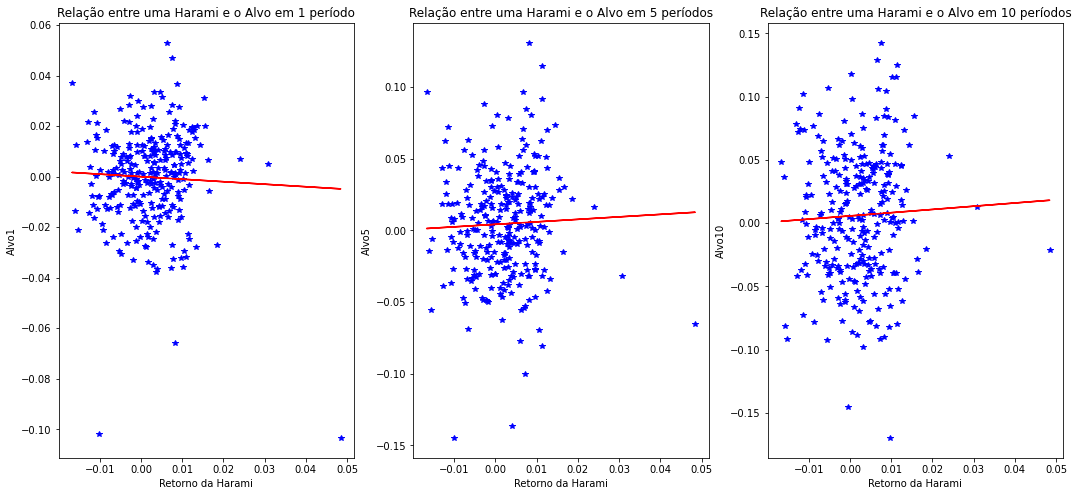

In [ ]:
df_harami = cria_grafico(df["harami"] != 0, "Harami")

### **Engolfo**

In [ ]:
df["engolfo"] = talib.CDLENGULFING(df["Open"], df["High"], df["Low"], df["Close"])
df["engolfo"] = np.where(df["engolfo"] == 100, 1
                            , np.where(df["engolfo"] == -100, -1, 0))

In [ ]:
engolfo = pd.pivot_table(df
               , index = ["engolfo"]
               , values = ["Alvo1", "Alvo5", "Alvo10"]
               , aggfunc = np.mean)*100
engolfo

,Alvo1,Alvo10,Alvo5
engolfo,,,
-1,-0.139734,0.323041,0.312442
0,0.056400,0.484681,0.240616
1,0.077239,0.519406,0.336229


In [ ]:
engolfo_cat = pd.pivot_table(df
               , index = ["engolfo"]
               , values = ["Alvo1_cat", "Alvo5_cat", "Alvo10_cat"]
               , aggfunc = np.mean)*100
engolfo_cat

,Alvo10_cat,Alvo1_cat,Alvo5_cat
engolfo,,,
-1,51.960784,47.549020,55.392157
0,55.236420,52.071122,54.904259
1,61.344538,49.579832,55.462185


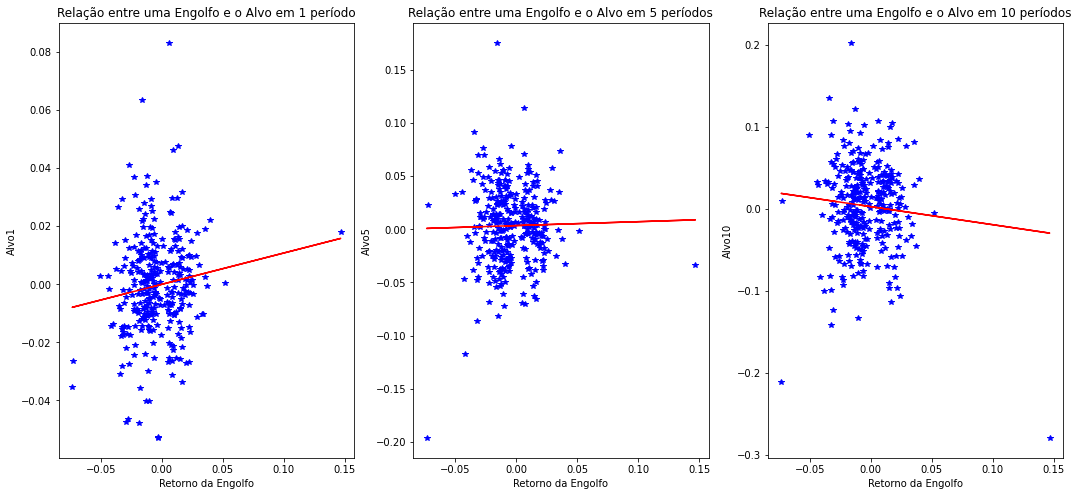

In [ ]:
df_engolfo = cria_grafico(df["engolfo"] != 0, "Engolfo")

### **Martelo**

In [ ]:
df["martelo"] = talib.CDLHAMMER(df["Open"], df["High"], df["Low"], df["Close"])
df["martelo"] = np.where(df["martelo"] == 100, 1
                            , np.where(df["martelo"] == -100, -1, 0))

O padrão de candle martelo, apesar de ter um baixo rentorno médio, para os três alvos, apresenta um percentual de positivo mais alto para o alvo de 10 períodos.

In [ ]:
martelo = pd.pivot_table(df
               , index = ["martelo"]
               , values = ["Alvo1", "Alvo5", "Alvo10"]
               , aggfunc = np.mean)*100
martelo

,Alvo1,Alvo10,Alvo5
martelo,,,
0,0.044036,0.486388,0.242868
1,0.203872,0.282122,0.316637


In [ ]:
martelo_cat = pd.pivot_table(df
               , index = ["martelo"]
               , values = ["Alvo1_cat", "Alvo5_cat", "Alvo10_cat"]
               , aggfunc = np.mean)*100
martelo_cat

,Alvo10_cat,Alvo1_cat,Alvo5_cat
martelo,,,
0,55.109420,51.703140,54.881066
1,59.139785,55.913978,56.451613


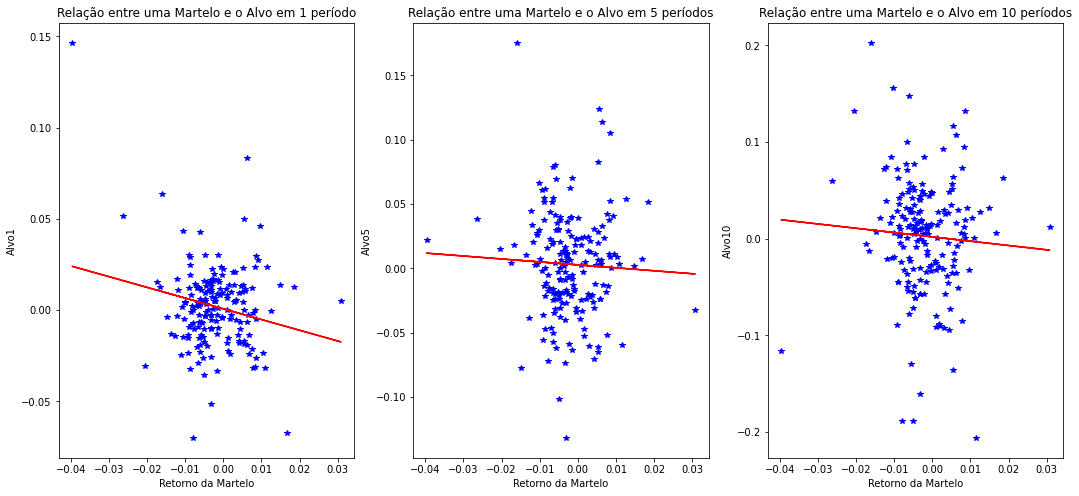

In [ ]:
df_martelo = cria_grafico(df["martelo"] != 0, "Martelo")

In [ ]:
print(doji)
print("------------------------------------------")
print(marubozu)
print("------------------------------------------")
print(harami)
print("------------------------------------------")
print(engolfo)
print("------------------------------------------")
print(martelo)

              Alvo1    Alvo10     Alvo5
doji_star                              
-1         0.542657  1.270057  1.022424
 0         0.044983  0.467917  0.236332
 1         0.186390  1.577027  0.860611
------------------------------------------
             Alvo1    Alvo10     Alvo5
marubozu                              
-1        0.141213  0.845167  0.536881
 0        0.025183  0.478836  0.227567
 1        0.148672  0.251068  0.175598
------------------------------------------
           Alvo1    Alvo10     Alvo5
harami                              
-1     -0.102290  0.303356  0.206419
 0      0.053350  0.471462  0.233676
 1      0.033993  0.831382  0.619600
------------------------------------------
            Alvo1    Alvo10     Alvo5
engolfo                              
-1      -0.139734  0.323041  0.312442
 0       0.056400  0.484681  0.240616
 1       0.077239  0.519406  0.336229
------------------------------------------
            Alvo1    Alvo10     Alvo5
martelo             

______________________________________________________

### Passo 6 - Análise em um contexto mais amplo

Vou concatenar os dataframes de forma que o modelo só será aplicado caso pelo um dos padrões fosse identificado.

In [ ]:
# Concatenação dos nossos 5 dataframes
# Ou seja, é um modelo que seria aplicado quando e apenas se algum do padrões fosse identificado

df_padroes = pd.concat([df_marubozu, df_engolfo]) # se for remover ou adicionar, faça aqui (df_doji, , df_harami, df_martelo)
df_padroes.dropna(inplace = True)

alvo = "Alvo5"

df_padroes = df_padroes[[alvo, "marubozu", "engolfo"]]  #"doji_star", "harami", "martelo"

df_padroes.head(10)

,Alvo5,marubozu,engolfo
Data,,,
2000-01-19,-0.022267,-1,0
2000-02-02,0.088511,1,0
2000-02-03,0.065704,1,0
2000-02-04,0.008421,1,0
2000-02-08,-0.040940,1,0
2000-02-23,0.006729,1,0
2000-03-01,0.018214,1,0
2000-03-03,-0.075676,1,0
2000-03-09,-0.054048,1,0


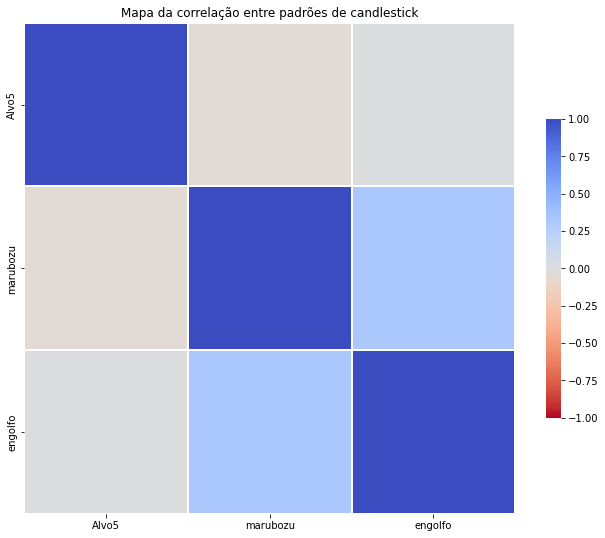

In [ ]:
# Mapa de correlação

corr = df_padroes.corr()

fig, ax = plt.subplots(figsize = (11, 11))
plt.title("Mapa da correlação entre padrões de candlestick");

# Plota o mapa
sns.heatmap(corr, cmap = "coolwarm_r", vmax = 1, vmin = -1
            , center = 0, square = True, linewidths = 1
            , cbar_kws = {"shrink": .5});

In [ ]:
# Separando os dados com as variaveis em x e o alvo em y

# Separando os dados entre treinamento e teste

# Vamos treinar o modelo de 2003 a 2009
start_train = "2003-02-17"
end_train = "2009-12-31"

# Vamos testar o modelo de 2010 a 2021
start_test = "2010-01-01"
end_test = "2021-04-15"

df1_train = df_padroes.loc[start_train : end_train]

df1_test = df_padroes.loc[start_test : end_test]


# Separando os dados com as variaveis em x e o alvo em y
 
x_train = df1_train.drop(alvo, axis = 1)
y_train = df1_train[alvo]

x_test = df1_test.drop(alvo, axis = 1)
y_test = df1_test[alvo]

In [ ]:
x_train

,marubozu,engolfo
Data,,
2003-02-18,1,0
2003-02-26,-1,0
2003-02-28,1,0
2003-03-06,1,0
2003-03-10,-1,0
...,...,...
2009-11-09,1,0
2009-11-12,-1,0
2009-12-01,1,0


In [ ]:
print(x_train.shape)
print(x_test.shape)

(431, 5)
(606, 5)


Não vou usar o retorno como variável, pois esta aula busca a curiosidade científica da aplicação dos padrões de candle sobre um modelo de regressão.

Apesar de o p-value não apresentar, em sua maioria, valores muito altos, mas isso será deixado de lado, nesse momento.

In [ ]:
# Treinando o modelo com statsmodels

# Nota importante: por padrão o statsmodels não acrescenta o intercepto
# Você deve acrescentá-lo manualmente
# Nota mental: Avaliar a remoção das variáveis menos significativas
# Nota mental: Comentar sobre o porque o sinal muda quando removemos variáveis - Paradoxo de Simpson
# Paper recomendado: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2266743/pdf/1742-7622-5-5.pdf

x_train_ = sm.add_constant(x_train)
x_test_ = sm.add_constant(x_test)

lr_sm = sm.OLS(y_train, x_train_).fit()

y_pred_train_sm = lr_sm.predict(x_train_)

y_pred_test_sm = lr_sm.predict(x_test_)

# Print out the statistics
lr_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Alvo5   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     2.787
Date:                Tue, 15 Mar 2022   Prob (F-statistic):             0.0629
Time:                        11:32:27   Log-Likelihood:                 670.66
No. Observations:                 382   AIC:                            -1335.
Df Residuals:                     379   BIC:                            -1323.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0093      0.002      4.054      0.000       0.005       0.014
marubozu      -0.0056      0.002     -2.352      0.019      -0.010      -0.001
engolfo        0.0073      0.008      0.943      0.346      -0.008       0.022
==============================================================================
Omnibus:                       78.670   Durbin-Watson:                   1.441
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              557.266
Skew:                          -0.643   Prob(JB):                    9.80e-122
Kurtosis:                       8.776   Cond. No.                         4.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
print("Ocorrência concorrente de padrões") #inclui quando não ocorrem
round(np.mean(df_padroes.loc[: , "marubozu"] == df_padroes.loc[: , "engolfo"]), 2)*100

Ocorrência concorrente de padrões


22.0

In [ ]:
# Avaliação dos resultados com statsmodels

MAE_train_sm = sm.tools.eval_measures.meanabs(y_train, y_pred_train_sm)
R2_train_sm = lr_sm.rsquared # Coeficiente de determinação
RMSE_train_sm = sm.tools.eval_measures.rmse(y_train, y_pred_train_sm)

print("----- Avaliaçao do treinamento -----")
print("MAE: ", round(MAE_train_sm, 3))
print('R2: ', round(R2_train_sm, 3))
print('RMSE: ', round(RMSE_train_sm, 3))

MAE_test_sm = sm.tools.eval_measures.meanabs(y_test, y_pred_test_sm) 
RMSE_test_sm = sm.tools.eval_measures.rmse(y_test, y_pred_test_sm)

print("")
print("----- Avaliaçao do teste -----")
print("MAE: ", round(MAE_test_sm, 3))
print('RMSE: ', round(RMSE_test_sm, 3))

----- Avaliaçao do treinamento -----
MAE:  0.03
R2:  0.014
RMSE:  0.042

----- Avaliaçao do teste -----
MAE:  0.025
RMSE:  0.033


In [ ]:
# Residuals x Fitted Values

plt.figure(figsize = (6, 6))
plt.plot(lr_sm.resid, y_pred_train_sm, ".", color = "blue")
plt.hlines(y = 0, xmin = min(lr_sm.resid), xmax = max(lr_sm.resid), color = "red")
plt.xlabel("Residuals")
plt.ylabel("Fitted Values")
plt.title("Residuals x Fitted Values");

# Normality plot
import scipy as sp

fig, ax = plt.subplots(figsize=(6, 6))
sp.stats.probplot(lr_sm.resid, plot = ax, fit = True);

fig = plt.figure(figsize=(12, 12))

fig = sm.graphics.plot_partregress_grid(lr_sm, fig = fig)

______________________________________________________

Veja que aqui utilizarei somente o sinal do predict para realizar a o cálculo do retorno e com base nisso realizar o backtest.

In [ ]:
# Calculando a performance - para toda a base
custo_op = 0.0001 
#0.01% - R$2 reais em R$20000, assumindo operação completa - C/V
#Cada ponto de um mini contrato de índice: R$0.20 - Assumindo então o indice em média de 100k pontos

y_pred_all = lr_sm.predict(df_padroes)
df_padroes.loc[: , "Previsto"] = y_pred_all
df_padroes.loc[:, "Sinal"] = np.sign(df_padroes.loc[: , "Previsto"])
df_padroes.loc[: , "Retorno_Modelo"] = df_padroes.loc[:, "Sinal"]*df_padroes[alvo] - custo_op

In [ ]:
print("Acurácia")
round(np.mean(np.sign(df_padroes.loc[: , "Previsto"]) == np.sign(df_padroes.loc[: , "Alvo5"])), 2)*100

Acurácia


49.0

In [ ]:
df_padroes.to_csv("teste.csv", index = True)

In [ ]:
# Para fazer um conditional plot

df_padroes.index.name = "Data"
df_padroes.reset_index(inplace = True)

df_padroes["Data"] = pd.to_datetime(df_padroes["Data"])

df_padroes["train_test"] = np.where(df_padroes["Data"] > end_train, 1, -1)

base_agregada = df_padroes.resample("M", on = "Data").sum()

base_agregada.loc[: , "Retorno_Modelo_Acumulado"] = base_agregada["Retorno_Modelo"].cumsum()*100

""


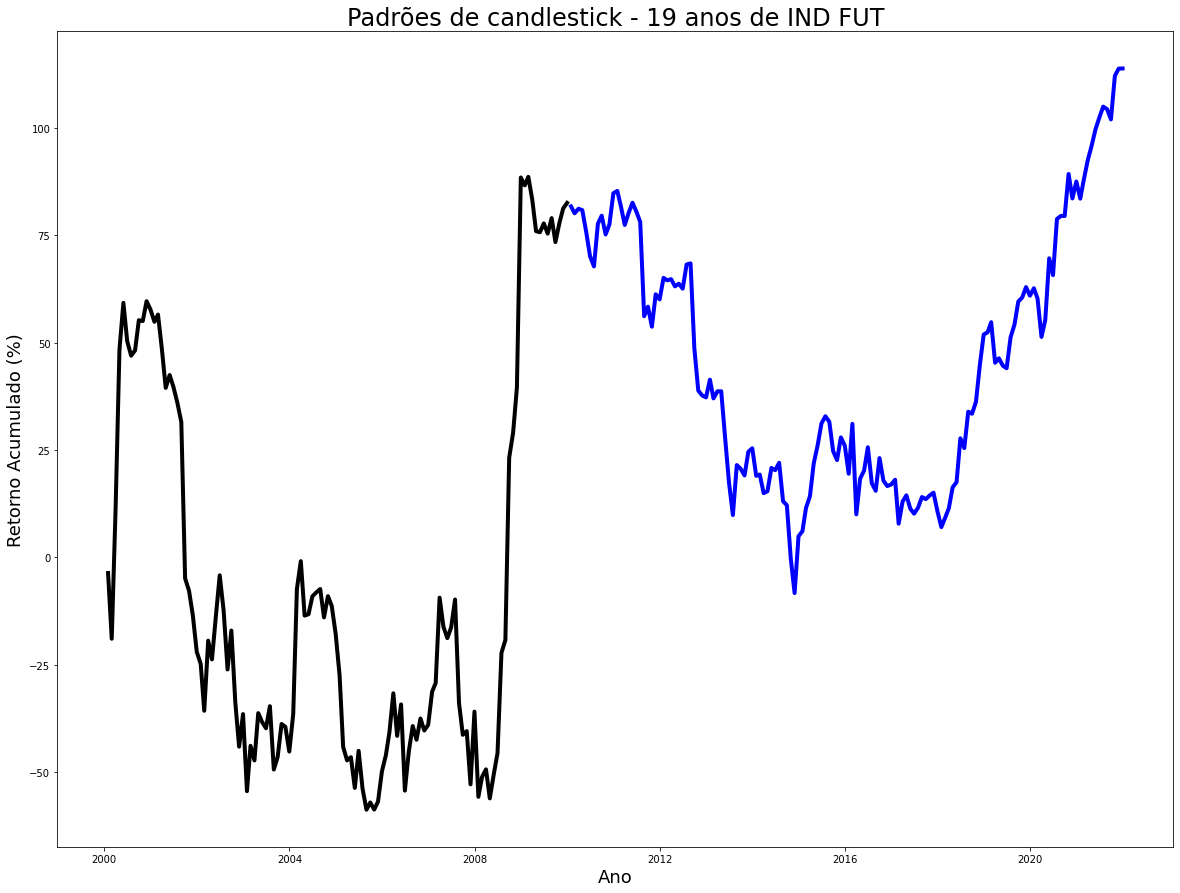

In [ ]:
# Plota o grafico
fig, ax = plt.subplots(figsize = (20, 15))

def grafico(group):
    color = "black" if (group["train_test"] < 0).all() else "blue"
    lw = 4.0
    ax.plot(group.index, group.Retorno_Modelo_Acumulado, c = color, linewidth = lw)
    plt.xlabel("Ano"
           , fontsize = 18);
    plt.ylabel("Retorno Acumulado (%)"
           , fontsize = 18);
    plt.title("Padrões de candlestick - 19 anos de IND FUT", fontsize = 24)
    #plt.axvline( x = end_train, color='purple', linestyle = "--", lw = 2)

base_agregada.groupby((base_agregada["train_test"].shift() * base_agregada["train_test"] < 0).cumsum()).apply(grafico)



In [ ]:
summary = df_padroes.copy()
summary["Data"] = pd.to_datetime(summary["Data"], format = "%Y-%m")

summary = summary.groupby([summary["Data"].dt.year]).agg({"Retorno_Modelo": sum})

summary.index = summary.index.set_names(["Ano"])

summary*100

,Retorno_Modelo
Ano,
2000,124.075254
2001,-123.088575
2002,-34.613694
2003,1.734356
2004,-13.507020
2005,-48.802812
2006,19.550794
2007,-2.872487
2008,188.931500
